In [115]:
import pandas as pd
import yfinance
from datetime import date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import joblib
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import AutoReg

In [116]:
StartDate = (date.today()-timedelta(days=365*2-1)).strftime('%Y-%m-%d')
EndDate= (date.today()).strftime('%Y-%m-%d')
StartDate,EndDate

('2022-02-02', '2024-02-01')

In [117]:
ticker = "^NSEI"
df=yfinance.download(tickers=ticker,start=StartDate,end=EndDate,interval='1h')
df.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [118]:
y= df[['High']]
y['High']=y['High'].shift(1)
y.dropna(inplace=True)
for i in range(len(y.columns)):
    adfTest = adfuller(y[y.columns[i]],autolag='AIC')
    if adfTest[1]<0.05:
        print(f'{adfTest[1]} is stationarity {y.columns[i]}')
    else:
        print(f'{adfTest[1]} is not stationarity {y.columns[i]}')

/tmp/ipykernel_5054/2283034364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['High']=y['High'].shift(1)
/tmp/ipykernel_5054/2283034364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


0.950251134742755 is not stationarity High


Index(['predictions'], dtype='object')


/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

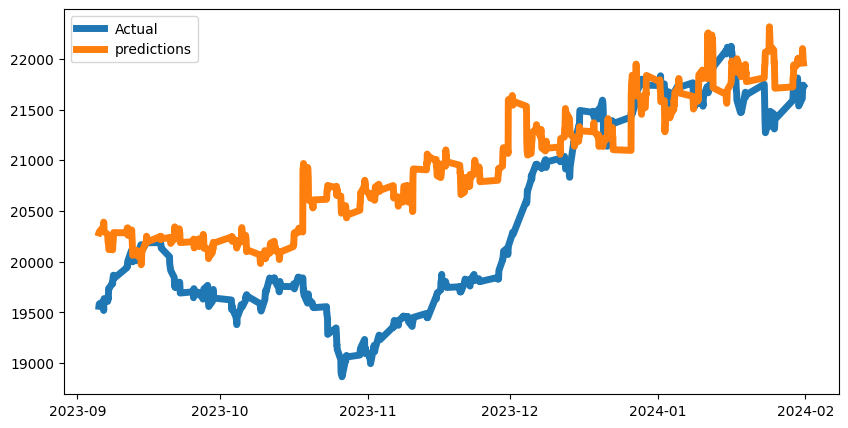

In [119]:
y=df[['High']]
train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]
AutoRegmodel = AutoReg(endog=train['High'], lags=[200,211,310,210,315], trend='t',period=12)
trained_model = AutoRegmodel.fit()
predictions = trained_model.forecast(len(test))
dataframe2 = pd.DataFrame(list(predictions),columns=['predictions'])
dataframe2.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
print(dataframe2.columns)
plt.plot(test['High'],label="Actual",linestyle="-",linewidth=5)
plt.plot(dataframe2['predictions'],label="predictions",linestyle="-",linewidth=5)
plt.legend()
mean_squared_error(test['High'],predictions)
model_save=joblib.dump(trained_model,"HighNewAutoReg.joblib")

In [120]:
model2 = joblib.load('HighNewAutoReg.joblib')
model2.forecast(1500)

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contai

2756    20282.969019
2757    20288.249714
2758    20294.885040
2759    20337.438351
2760    20298.386898
            ...     
4251    24853.652371
4252    24794.809884
4253    24748.370194
4254    24800.332053
4255    24963.313802
Length: 1500, dtype: float64

In [121]:
trained_model.forecast(1500)

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contai

2756    20282.969019
2757    20288.249714
2758    20294.885040
2759    20337.438351
2760    20298.386898
            ...     
4251    24853.652371
4252    24794.809884
4253    24748.370194
4254    24800.332053
4255    24963.313802
Length: 1500, dtype: float64

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

Index(['predictions'], dtype='object')


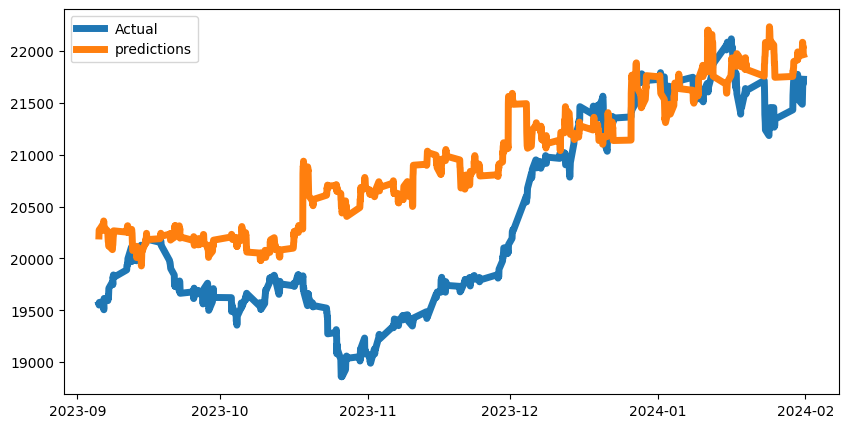

In [122]:
# Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

y=df[['Open']]
train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]
AutoRegmodel = AutoReg(endog=train['Open'], lags=[200,211,310,210,315], trend='t')
trained_model = AutoRegmodel.fit()
predictions = trained_model.forecast(len(test))
dataframe2 = pd.DataFrame(list(predictions),columns=['predictions'])
dataframe2.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
print(dataframe2.columns)
plt.plot(test['Open'],label="Actual",linestyle="-",linewidth=5)
plt.plot(dataframe2['predictions'],label="predictions",linestyle="-",linewidth=5)
plt.legend()
mean_squared_error(test['Open'],predictions)
model_save2=joblib.dump(trained_model,"OpenNewAutoReg.joblib")

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

Index(['predictions'], dtype='object')


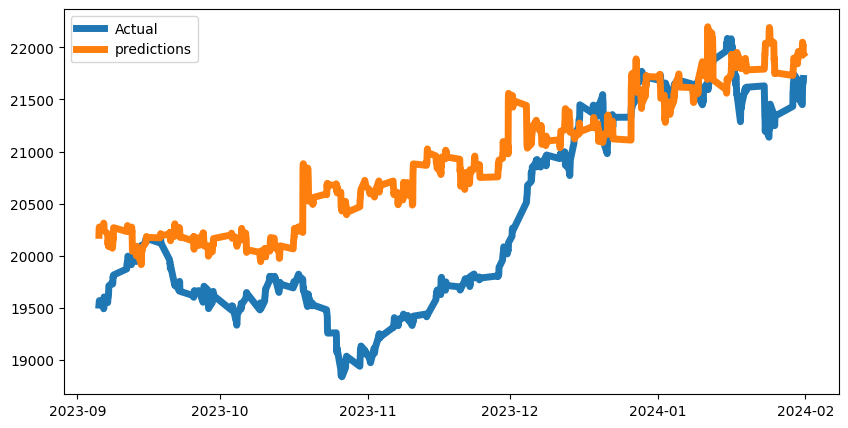

In [123]:
y=df[['Low']]
train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]
AutoRegmodel = AutoReg(endog=train['Low'], lags=[200,211,310,210,315], trend='t')
trained_model = AutoRegmodel.fit()
predictions = trained_model.forecast(len(test))
dataframe2 = pd.DataFrame(list(predictions),columns=['predictions'])
dataframe2.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
print(dataframe2.columns)
plt.plot(test['Low'],label="Actual",linestyle="-",linewidth=5)
plt.plot(dataframe2['predictions'],label="predictions",linestyle="-",linewidth=5)
plt.legend()
mean_squared_error(test['Low'],predictions)
model_save2=joblib.dump(trained_model,"LowNewAutoReg.joblib")

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

Index(['predictions'], dtype='object')


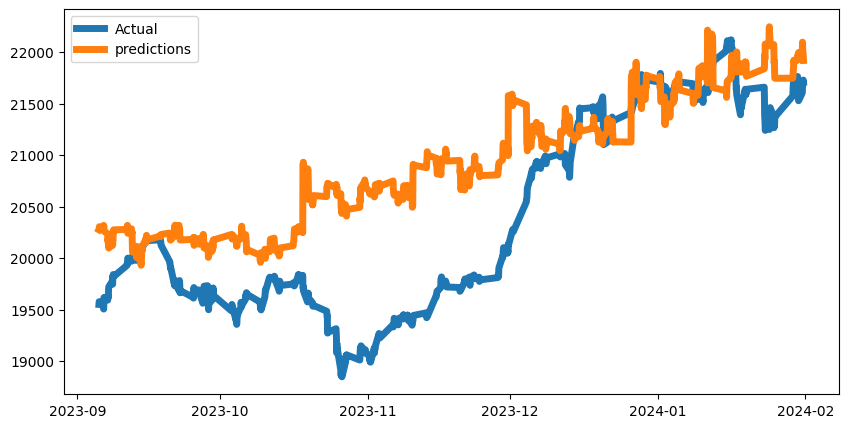

In [124]:
y=df[['Close']]
train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]
AutoRegmodel = AutoReg(endog=train['Close'], lags=[200,211,310,210,315], trend='t')
trained_model = AutoRegmodel.fit()
predictions = trained_model.forecast(len(test))
dataframe2 = pd.DataFrame(list(predictions),columns=['predictions'])
dataframe2.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
print(dataframe2.columns)
plt.plot(test['Close'],label="Actual",linestyle="-",linewidth=5)
plt.plot(dataframe2['predictions'],label="predictions",linestyle="-",linewidth=5)
plt.plot(df['Close'],label="----------",linestyle="-",linewidth=5)
plt.legend()
mean_squared_error(test['Close'],predictions)
model_save2=joblib.dump(trained_model,"CloseNewAutoReg.joblib")

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/tmp/ipykernel_5054/2596553144.py:4: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  AutoRegmodel = AutoReg(endog=train['Adj Close'], lags=[200,211,310,210,315], trend='t',old_names=True)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDat

Index(['predictions'], dtype='object')


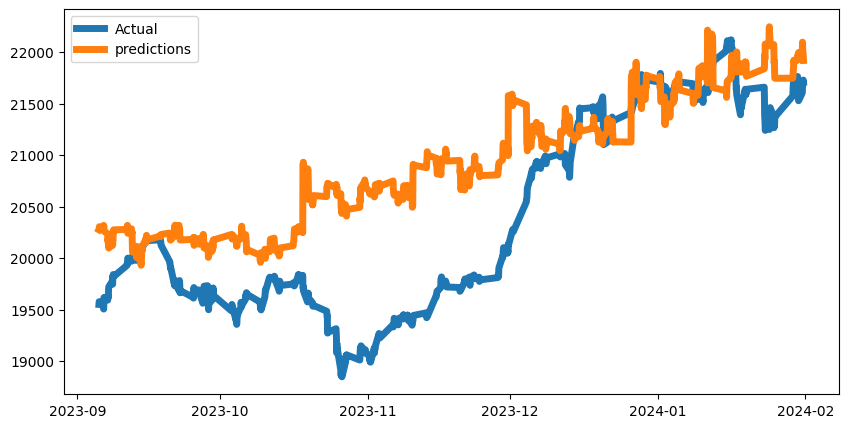

In [128]:
y=df[['Adj Close']]
train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]
AutoRegmodel = AutoReg(endog=train['Adj Close'], lags=[200,211,310,210,315], trend='t',old_names=True)
trained_model = AutoRegmodel.fit(use_t=True)
predictions = trained_model.forecast(len(test))
dataframe2 = pd.DataFrame(list(predictions),columns=['predictions'])
dataframe2.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
print(dataframe2.columns)
plt.plot(test['Adj Close'],label="Actual",linestyle="-",linewidth=5)
plt.plot(dataframe2['predictions'],label="predictions",linestyle="-",linewidth=5)
plt.legend()
model_save2=joblib.dump(trained_model,"AdjCloseNewAutoReg.joblib")

In [126]:
trained_model.forecast(1000)

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contai

2756    20275.075590
2757    20278.333767
2758    20305.152714
2759    20282.417546
2760    20289.117297
            ...     
3751    23386.429183
3752    23361.437649
3753    23358.250073
3754    23410.907569
3755    23227.376975
Length: 1000, dtype: float64

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

diff = y['High'].diff().dropna()
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(16, 4))
ax.plot(diff)
ax.set_title('Differenced Time Series')
plot_acf(y['High'], ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) of Original Time Series')
plt.show()


KeyError: 'High'

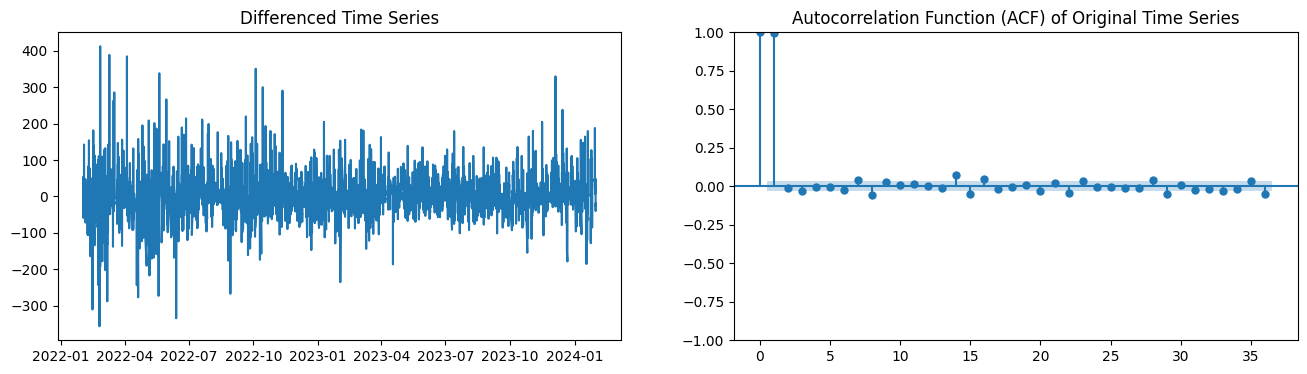

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = y['High'].diff().dropna()
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(16, 4))
ax.plot(diff)
ax.set_title('Differenced Time Series')
plot_pacf(y['High'], ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) of Original Time Series')
plt.show()

In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(y['High'],test='adf')

1

Performing stepwise search to minimize aic
 ARIMA(15,1,10)(0,0,0)[0] intercept   : AIC=inf, Time=56.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29943.386, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29945.373, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29945.374, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29941.815, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29947.388, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 57.130 seconds


/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


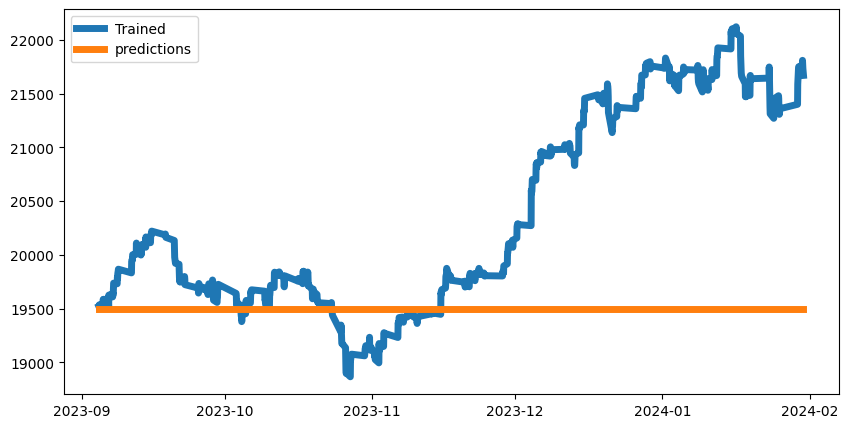

In [ ]:
from pmdarima.arima import auto_arima
auto_arima_model = auto_arima(train['High'],seasonal=True,
                              trace=True,
                              start_p= 15,
                              max_p=40,
                              start_q=10,
                              max_q=35,
                              error_action='ignore',
                              stationary=False,
                              stepwise=True,
                              maxiter=100)
forecasts = auto_arima_model.predict(test.shape[0])
dataframe = pd.DataFrame(list(forecasts),columns=['predictions'])
dataframe.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
plt.plot(test['High'],label="Trained",linestyle="-",linewidth="5")
plt.plot(dataframe['predictions'],label="predictions",linestyle="-",linewidth="5")
plt.legend()

In [ ]:
len(train.index) , len(train.High)

(2755, 2755)

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           52     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43639D+00    |proj g|=  1.89778D-01


 This problem is unconstrained.



At iterate    5    f=  5.39472D+00    |proj g|=  2.80257D+00

At iterate   10    f=  5.38980D+00    |proj g|=  4.14864D-02

At iterate   15    f=  5.38860D+00    |proj g|=  1.47382D-01

At iterate   20    f=  5.38802D+00    |proj g|=  3.12710D-01

At iterate   25    f=  5.38584D+00    |proj g|=  2.73731D-02

At iterate   30    f=  5.38264D+00    |proj g|=  3.35528D-01

At iterate   35    f=  5.37988D+00    |proj g|=  7.41245D-02

At iterate   40    f=  5.37906D+00    |proj g|=  1.87634D-02

At iterate   45    f=  5.37749D+00    |proj g|=  1.74770D-01

At iterate   50    f=  5.37446D+00    |proj g|=  5.29638D-02

At iterate   55    f=  5.37268D+00    |proj g|=  8.31125D-02

At iterate   60    f=  5.37171D+00    |proj g|=  1.48225D-01

At iterate   65    f=  5.37153D+00    |proj g|=  3.19348D-02

At iterate   70    f=  5.37132D+00    |proj g|=  6.61600D-02

At iterate   75    f=  5.37116D+00    |proj g|=  9.31159D-02

At iterate   80    f=  5.37086D+00    |proj g|=  3.56943D-02

At iter

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate  100    f=  5.36959D+00    |proj g|=  3.31829D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   52    100    111      1     0     0   3.318D-01   5.370D+00
  F =   5.3695893544054201     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


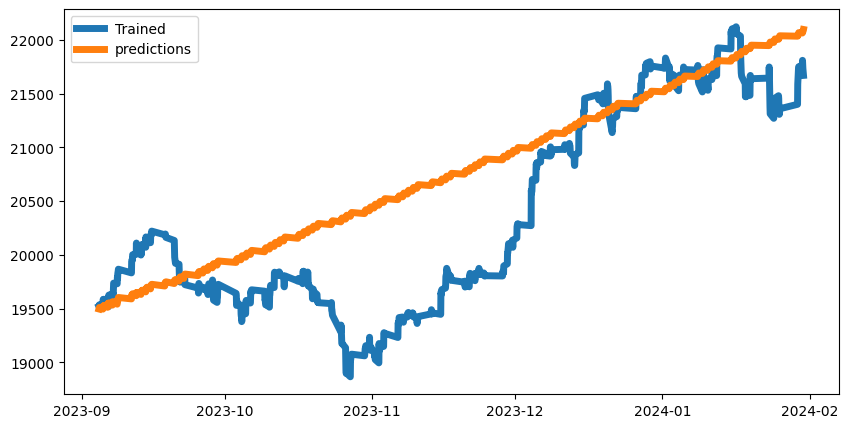

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Sarimax_Model = SARIMAX(endog=train['High'], order=(35,1,15),trend='t')
fit = Sarimax_Model.fit(maxiter=100,cov_type='robust')
predictions = fit.predict(start=len(train['High']),end=len(train['High'])+len(test['High'])-1)
dataframe = pd.DataFrame(list(predictions),columns=['predictions'])
dataframe.set_index(keys=test.index,inplace=True)
plt.figure(figsize=(10,5))
plt.plot(test['High'],label="Trained",linestyle="-",linewidth="5")
plt.plot(dataframe['predictions'],label="predictions",linestyle="-",linewidth="5")
plt.legend()

In [ ]:
predictions2 = fit.forecast(800)
predictions2

/home/ongraph/Desktop/OnGraphProject/timeSeries/PractiseTimeSeries/StockDataTimeSeries/NIFTY/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2755    19496.428709
2756    19503.010671
2757    19510.026121
2758    19495.061463
2759    19523.725394
            ...     
3550    22553.956552
3551    22552.107049
3552    22560.242834
3553    22563.628026
3554    22565.872217
Name: predicted_mean, Length: 800, dtype: float64

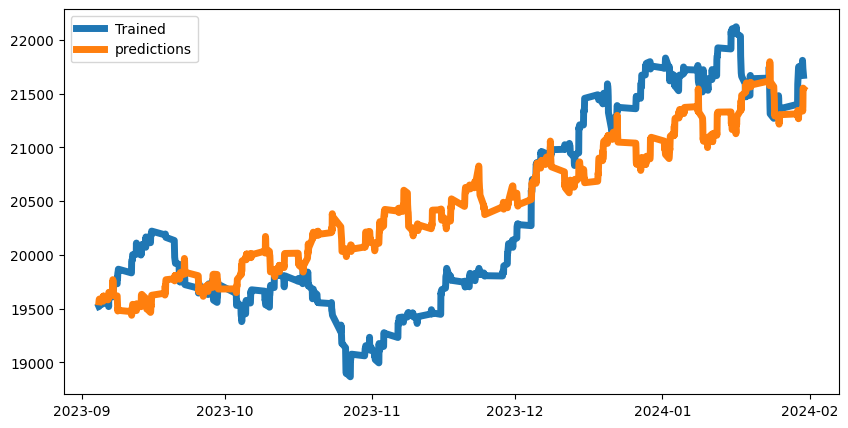

In [ ]:
from pmdarima.arima import ARIMA
model =ARIMA()